## **YAP 101 Homework-7**  
Due Date: 30 March 2020 23:59

Send your files to m.torusdag@etu.edu.tr

The subject of your email should be "YAP101 HW7"

Total score is 105

In this homework, you will use the  forestfires.csv file which is uploaded on Piazza. Each row represents a forest fire in Portugal with several attributes and the area of the fire. Your task is to build a regression model that predicts the fire area. The columns in the file are as follows. 

    X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
    Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
    month - month of the year: 'jan' to 'dec'
    day - day of the week: 'mon' to 'sun'
    FFMC - FFMC index from the FWI system: 18.7 to 96.20
    DMC - DMC index from the FWI system: 1.1 to 291.3
    DC - DC index from the FWI system: 7.9 to 860.6
    ISI - ISI index from the FWI system: 0.0 to 56.10
    temp - temperature in Celsius degrees: 2.2 to 33.30
    RH - relative humidity in %: 15.0 to 100
    wind - wind speed in km/h: 0.40 to 9.40
    rain - outside rain in mm/m2 : 0.0 to 6.4
    area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).


In [2]:
# Run this cell first
from datascience import * 
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

**Question 1 (5 Points)**. Load the data. We want to use the first 80% of the data for training and the last 20% for testing. 

In [194]:
# write your answer here

data =Table.read_table('forestfires.csv')
data_shufled = data.shuffle()
data_shufled
a=np.log(data_shufled.column('area')+1)
data_shufled=data_shufled.drop('area')
data_shufled=data_shufled.with_column('area',a)
data_shufled



X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,2.37676
4,6,mar,sun,89.3,51.3,102.2,9.6,10.6,46,4.9,0,0
7,4,sep,sun,92.4,105.8,758.1,9.9,25.3,27,2.7,0,0
9,9,jul,sun,90.1,68.6,355.2,7.2,24.8,29,2.2,0,0.858662
2,4,sep,sun,92.4,105.8,758.1,9.9,16,45,1.8,0,0
7,5,aug,sat,93.7,231.1,715.1,8.4,26.4,33,3.6,0,0
2,5,oct,sun,92.6,46.5,691.8,8.8,15.4,35,0.9,0,0
1,2,aug,sun,91.4,142.4,601.4,10.6,19.5,39,6.3,0,0
7,5,jun,sun,93.1,180.4,430.8,11,22.2,48,1.3,0,0
5,4,sep,sat,92.2,102.3,751.5,8.4,24.1,27,3.1,0,0


In [195]:




#write your answer here**
months = data.group('month').column(0)
days = data.group('day').column(0)

data2 =data_shufled
size = data2.num_rows
for i in range(0,len(months)):
    labels = np.zeros(len(months))
    labels[i] = 1
    tmp_table = Table().with_columns('month',months,months[i],labels)
    data2 = data2.join('month',tmp_table)    
data2 = data2.drop('month')
for i in range(0,len(days)):
    labels = np.zeros(len(days))
    labels[i] = 1
    tmp_table = Table().with_columns('day',days,days[i],labels)
    data2 = data2.join('day',tmp_table)
    
data2 = data2.drop('day')
train = data2.take(np.arange(0,int(size*0.8)))
test =data2.take(np.arange(int(size*0.8),size))
train.show(3)


X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
4,4,83,23.3,85.3,2.3,16.7,20,3.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,91.6,112.4,573,8.9,11.2,84,7.6,0,1.45862,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,5,63.5,70.8,665.3,0.8,17,72,6.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


**Question 2 (15 Points)** Build a linear regression model to predict area of forest fires using all features. Print the weigths of each feature and bias value.

In [196]:
train_area=train.column('area')
train_features=train.drop('area')

# y =w1*x1+w2*x2+w3*x3+bias
def prediction_area(weigths, bias,x):
    return sum(weigths*x) + bias
train_features

X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
4,4,83,23.3,85.3,2.3,16.7,20,3.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,91.6,112.4,573,8.9,11.2,84,7.6,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,5,63.5,70.8,665.3,0.8,17,72,6.7,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,4,91.6,112.4,573,8.9,21.4,42,3.1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,6,90.1,108,529.8,12.5,21.2,51,8.9,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4,90.6,269.8,811.2,5.5,22.2,45,3.6,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4,90.5,196.8,649.9,16.3,11.8,88,4.9,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3,95.9,158,633.6,11.3,32.4,27,2.2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3,95.9,158,633.6,11.3,27.5,29,4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,94.3,167.6,684.4,13,21.8,53,3.1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [197]:
def rmse(weights, bias,features,area):
    errors =[] 
    for i in np.arange(len(area)):
        predicted = prediction_area(weights,bias, np.array(features.row(i)))
        actual = area.item(i)
        errors.append((predicted - actual) ** 2)
    return np.mean(errors) ** 0.5
    
def rmse_train(weights):
    return rmse(weights[0:len(weights)-1],weights[len(weights)-1],train_features,train_area)
    
    

In [198]:
initial_weights=np.ones(len(train_features.row(0))+1)

learned_weights=minimize(rmse_train,start=initial_weights,smooth=True,array=True)



In [199]:
column_names = np.array(train_features.labels)
column_names= np.append(column_names,'bias')
for i in range(0,len(column_names)):
    print(str(column_names[i]) +'  '+str(learned_weights[i])  )



X  0.049842374041361034
Y  -0.029399253265922954
FFMC  0.011380197850051168
DMC  0.0030211644667212083
DC  -0.001368023765323848
ISI  -0.00928155493004109
temp  0.03252995363081708
RH  0.002796681810202865
wind  0.08227195733065652
rain  0.061606028992013735
apr  0.5701197687243199
aug  0.5160035275088888
dec  2.3906014359321714
feb  0.6150612170949399
jan  0.16661463798782133
jul  0.38165992206129945
jun  0.15476478432541269
mar  0.2125174649754495
may  1.0974883446053871
nov  1.0
oct  1.030557893341968
sep  1.0645420483884362
fri  0.30418363010487304
mon  0.47097427603889375
sat  0.6462198580816177
sun  0.5300010822727917
thu  0.42576337057129005
tue  0.8227783863629432
wed  1.0
bias  -1.8000730672363026


**Question 3 (15 Points)** We want to know which feautures are correlated each other. Calculate pearson correlation between each feature pair. Print the results in a matrix format (the diagonals should be 1).

In [225]:
from scipy.stats import pearsonr


for i in range(0,len(train_features)):
    for j in range(0,len(train_features)):
        print (round(pearsonr(train_features.column(i),train_features.column(j))[0],2),end=' ')
    print()
    

        
train_features.group('fri')        
    

1.0 0.53 0.0 -0.06 -0.1 0.03 -0.07 0.07 0.02 0.06 0.07 -0.03 -0.05 0.05 -0.05 0.05 0.09 0.04 0.01 nan 0.08 -0.1 -0.02 0.05 0.03 -0.03 0.0 -0.06 nan 
0.53 1.0 -0.05 -0.01 -0.11 -0.03 -0.04 0.07 -0.03 0.03 0.01 0.02 0.06 0.02 0.01 0.02 0.07 0.06 -0.02 nan -0.0 -0.12 -0.05 0.03 0.01 0.01 0.04 -0.09 nan 
0.0 -0.05 1.0 0.36 0.32 0.49 0.41 -0.31 -0.03 0.05 -0.12 0.19 -0.12 -0.25 -0.48 0.05 -0.06 -0.07 -0.04 nan -0.01 0.1 0.03 -0.05 -0.01 -0.09 0.09 0.09 nan 
-0.06 -0.01 0.36 1.0 0.68 0.25 0.47 0.07 -0.09 0.06 -0.21 0.5 -0.17 -0.32 -0.12 -0.02 -0.05 -0.4 -0.09 nan -0.17 0.11 -0.02 -0.13 -0.01 0.02 0.09 0.11 nan 
-0.1 -0.11 0.32 0.68 1.0 0.21 0.5 -0.05 -0.17 0.03 -0.28 0.28 -0.1 -0.4 -0.13 -0.09 -0.19 -0.64 -0.13 nan 0.09 0.54 -0.0 -0.06 -0.04 0.0 0.06 0.07 nan 
0.03 -0.03 0.49 0.25 0.21 1.0 0.35 -0.13 0.11 0.06 -0.1 0.25 -0.16 -0.24 -0.11 0.04 0.1 -0.13 -0.07 nan -0.05 -0.01 0.07 -0.17 -0.03 0.02 -0.01 0.24 nan 
-0.07 -0.04 0.41 0.47 0.5 0.35 1.0 -0.53 -0.22 0.08 -0.17 0.34 -0.32 -0.3 -0.16 0

fri,count
0,328
1,85


**Question 4 (5 Points)** Calculate Pearson correlation of each feature with the forest fire area.

In [203]:

print('Pearson correlation for each feature with the forest fire area.')
result=[]
for i in range(0,len(train_features)):
    
    row=pearsonr(train_features.column(i),train_area)[0]
    result.append(row)
    print (str(column_names[i]) +'  '+str(row))

def mutlak(x):
    
    return 
    
Correlation_table_for_feature=Table().with_columns('Labels',column_names[:len(column_names)-1],'Corelation with Area',result).with_column('Absolute Corelation with Area',abs(Correlation_table_for_feature.column('Corelation with Area')))
Correlation_table_for_feature_sorted=Correlation_table_for_feature.where('Absolute Corelation with Area',are.above_or_equal_to(0)).sort('Absolute Corelation with Area',descending=True)
    

Pearson correlation for each feature with the forest fire area.
X  0.05049537918842969
Y  0.014729650059648457
FFMC  0.05824416512505523
DMC  0.04377977380904798
DC  0.03841039011227797
ISI  0.010057444270250177
temp  0.029181263374785785
RH  -0.04016794007255663
wind  0.10393396124597931
rain  0.040343665287560615
apr  0.012705208643537745
aug  -0.025529217736360754
dec  0.13113779357844407
feb  -0.006014898848106874
jan  -0.055332154627568804
jul  -0.012754330489404303
jun  -0.03166906067774514
mar  -0.0541376968307047
may  0.03711674356313818
nov  nan
oct  -0.011192863905184272
sep  0.04929412813668428
fri  -0.047808399792384416
mon  -0.0033836476340481647
sat  0.046049392489842494
sun  0.009491261155699943
thu  -0.022136488855183233
tue  0.03287953939024034
wed  nan


**Question 5 (15 Points)Feature Selection** We want to use 5 features which have the highest orrelation with the forest fire area. However, we do not want to use any correlated feature such that no feature pair in these selected features should have a correlation higher than 0.5 or less than -0.5. If there is such a pair, remove the  feature which is less correlated with forest fire area and pick the feature which has the most correlation with the fire area among all other previosuly not selected features. Eventually you should have 5 features.

In [204]:
First_five_row=Correlation_table_for_feature_sorted.take(np.arange(0,5))
Correlation_table_for_feature_sorted=Correlation_table_for_feature_sorted.remove(range(0,5))
Correlation_table_for_feature_sorted

Labels,Corelation with Area,Absolute Corelation with Area
X,0.0504954,0.0504954
sep,0.0492941,0.0492941
fri,-0.0478084,0.0478084
sat,0.0460494,0.0460494
DMC,0.0437798,0.0437798
rain,0.0403437,0.0403437
RH,-0.0401679,0.0401679
DC,0.0384104,0.0384104
may,0.0371167,0.0371167
tue,0.0328795,0.0328795


In [205]:
First_five_row

Labels,Corelation with Area,Absolute Corelation with Area
dec,0.131138,0.131138
wind,0.103934,0.103934
FFMC,0.0582442,0.0582442
jan,-0.0553322,0.0553322
mar,-0.0541377,0.0541377


In [206]:

def control_more_or_less(labels):
    
    for label1 in labels:
        for label2 in labels:
            if(label1==label2):
                continue
            r =pearsonr(train_features.column(label1),train_features.column(label2))[0]
            if(r>0.5 or r<-0.5):
                return (label1,label2)
    
    return True
    
    
control_more_or_less(First_five_row.column(0))

def find_row_indice_label_table(label):
    
    label_column = First_five_row.column(0)
    count=0
    for lbl in label_column:
        if label==lbl:
            return count
        count+=1
        
        
        
    
    
    
    
    
    
    

def label_delete(labels):
    label1=labels[0]
    label2=labels[1]
    
    label1_correlation_with_area=pearsonr(train_features.column(label1),train_area)[0]
    label2_correlation_with_area=pearsonr(train_features.column(label2),train_area)[0]
    if label1_correlation_with_area>=label2_correlation_with_area:
        First_five_row.remove(find_row_indice_label_table(label2))
    else:
        First_five_row.remove(find_row_indice_label_table(label1))
        
    First_five_row.append(Correlation_table_for_feature_sorted.take(0))
    Correlation_table_for_feature_sorted.remove(0)
        
def FeatureSelection(Table):
    
    labels =Table.column(0)
    
    control=control_more_or_less(labels)
   
    if(control==True):
        print(labels)
        
        return
    
    label_delete(control)
    
    return FeatureSelection(First_five_row)
    
        
FeatureSelection(First_five_row)    
    
    
        
        
    
    
    
    

['dec' 'wind' 'FFMC' 'jan' 'mar']


In [207]:
First_five_row

Labels,Corelation with Area,Absolute Corelation with Area
dec,0.131138,0.131138
wind,0.103934,0.103934
FFMC,0.0582442,0.0582442
jan,-0.0553322,0.0553322
mar,-0.0541377,0.0541377


In [208]:
five_features=First_five_row.column(0)
five_features_table=Table()
for feature in five_features:
    print(feature)
    five_features_table=five_features_table.with_column(feature,train.column(feature))
    
    

five_features_table

dec
wind
FFMC
jan
mar


dec,wind,FFMC,jan,mar
0,3.1,83,0,0
0,7.6,91.6,0,0
0,6.7,63.5,0,0
0,3.1,91.6,0,0
0,8.9,90.1,0,0
0,3.6,90.6,0,0
0,4.9,90.5,0,0
0,2.2,95.9,0,0
0,4.5,95.9,0,0
0,3.1,94.3,0,0


**Question 6 (15 Points)** Build a linear regression model using the features selected in Question 5. Print the weigths of each feature and bias value.

In [209]:


# y =w1*x1+w2*x2+w3*x3+bias
def prediction_area(weigths, bias,x):
    return sum(weigths*x) + bias


def rmse_with_five(weights, bias,features,area):
    errors =[] 
    for i in np.arange(len(area)):
        predicted = prediction_area(weights,bias, np.array(five_features_table.row(i)))
        actual = area.item(i)
        errors.append((predicted - actual) ** 2)
    return np.mean(errors) ** 0.5
    
def rmse_train_with_five_feature(weights):
    return rmse_with_five(weights[0:len(weights)-1],weights[len(weights)-1],five_features_table,train_area)
    

In [210]:

initial_five_weights=np.ones(len(five_features_table.row(0))+1)
learned_weights_with_five=minimize(rmse_train_with_five_feature,start=initial_five_weights,smooth=True,array=True)


In [211]:
learned_weights_with_five

array([ 1.22710572,  0.06518457,  0.01437652, -0.40287502, -0.26274086,
       -0.45168387])

In [212]:
column_names = np.array(five_features_table.labels)
column_names= np.append(column_names,'bias')
for i in range(0,len(column_names)):
    print(str(column_names[i]) +'  '+str(learned_weights_with_five[i])  )


dec  1.2271057217202788
wind  0.06518457140626864
FFMC  0.014376522666136315
jan  -0.4028750172412079
mar  -0.2627408623613958
bias  -0.45168387410805166


**Question 7 (10 Points)**  Calculate root mean square error value of your models in Question 2 and Question 6 on your test data.

In [213]:
#write your answer here**
five_rmse=rmse_with_five(learned_weights_with_five[0:len(learned_weights_with_five)-1],learned_weights_with_five[len(learned_weights_with_five)-1],five_features_table,train_area)
first_rsme=rmse(learned_weights[0:len(learned_weights)-1],learned_weights[len(learned_weights)-1],train_features,train_area)

print('With five features rmse '+str(five_rmse))
print('With all features rmse  '+str(first_rsme))



With five features rmse 1.3646853694649423
With all features rmse  1.3424715558500797


**Question 8 (5 Points)** Plot the test data where x axis is the actual forest fire area and y axis is the predicted values by the model in Question 2 and Question 6. The colors for each model should be different. 

In [214]:


five_features=First_five_row.column(0)
five_features_table=Table()
for feature in five_features:
 
    five_features_table=five_features_table.with_column(feature,test.column(feature))
    

    
def prediction_result(weights, bias,five_features_table):
    result = []
    for i in np.arange(len(five_features_table.column(0))):
        predicted = prediction_area(weights,bias, np.array(five_features_table.row(i)))
        result.append(predicted)
    return result    


five_atrribute_prediction=prediction_result(learned_weights_with_five[0:len(learned_weights_with_five)-1],learned_weights_with_five[len(learned_weights_with_five)-1],five_features_table)

all_atrribute_prediction=prediction_result(learned_weights[0:len(learned_weights)-1],learned_weights[len(learned_weights)-1],test.drop('area'))


Prediction_table =Table().with_columns('Fire Area',test.column('area'),'Five Atribute Prediction',
                                      five_atrribute_prediction,'All Atribute Prediction',
                                      all_atrribute_prediction).sort('Fire Area',descending=True)


Prediction_table

Fire Area,Five Atribute Prediction,All Atribute Prediction
5.36542,0.999986,1.39709
5.22982,1.15997,1.88216
4.66965,0.963767,1.7978
4.64813,1.03258,1.63378
4.49413,1.17723,2.05147
4.47107,1.23877,1.88757
4.42784,1.12738,1.44394
3.92375,1.2263,1.6197
3.72666,1.1059,1.65869
3.6561,1.13697,1.73817


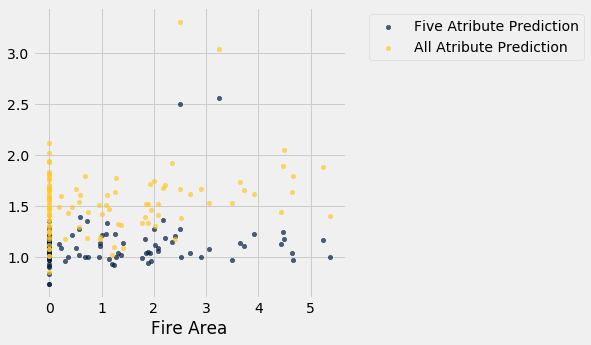

In [215]:


Prediction_table.scatter('Fire Area')



**Question 9(20 Points)K-fold**. Build a knn model for this problem where the predicted area is the mean of the closest 3 neighbors. Calculate RMSE score for this model on your test data.

In [216]:
def distance(data1,data2):
    
    data1=np.array(data1)
    data2=np.array(data2)

    
    return np.sqrt(np.sum((data1-data2)**2))
    
def distanceCalculator(train_with_numeric, new):
    data_without_target =train_with_numeric.drop('area')
   
    def subDistance(row):
        return distance(np.array(new),np.array(row))
    return data_without_target.apply(subDistance)

def appending_sorted_DistancetoTable(data_without_target, new):
    
    return data_without_target.with_column('Distance',distanceCalculator(data_without_target, new)).sort('Distance')

def closest(data,newpoint,k):
    
    data_with_distance = appending_sorted_DistancetoTable(data,newpoint)
    taken_k=data_with_distance.take(np.arange(0,k))
    return taken_k

def predictionKNN(train,new,k):


    taken = closest(train,new,3)
    
   
    return np.mean(taken.column('area'))


def accuracy(train_data,test_data,k):
    
    test_features = test_data.drop('area')
    
    def detection(row):
        return predictionKNN(train_data,row,k)
    
    test_class_result = test_features.apply(detection)
    return test_data.with_column('area prediction',test_class_result)


test_feature=test.drop('area')
result_table = accuracy(train,test,3)
result_table


def rmse_KNN(Table):
    errors =[] 
    for i in np.arange(len(Table.column('area'))):
        predicted =Table.column('area prediction')[i] 
        actual = Table.column('area')[i] 
        errors.append((predicted - actual) ** 2)
    
    return np.mean(errors) ** 0.5

rmse_KNN(result_table)

1.556235101167714

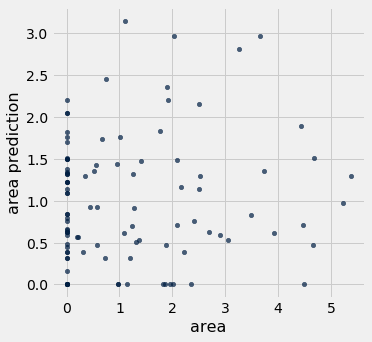

In [217]:
result_table.select('area','area prediction').scatter('area')